## 通过前面的代码我们可以看到当参数为高阶的时候，可以发现算法的预测能力比较强；这里通过比较高阶和低阶的时候参数值的变化，提出过拟合

In [96]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [97]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=['simHei']
mpl.rcParams['axes.unicode_minus']=False

In [98]:
## 创建模拟数据
np.random.seed(100)
np.set_printoptions(linewidth=1000,suppress=True)
N = 10
x = np.linspace(0,6,N) + np.random.randn(N)
y = 1.8*x**3 + x**2 -14*x - 7 + np.random.randn(N)
## 将其设置为矩阵
x.shape = -1,1
y.shape = -1,1

In [99]:
# RidgeCV和Ridge的区别是：前者可以进行交叉验证
models = [
    Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',LinearRegression(fit_intercept=False))
    ]),
    Pipeline([
       ('Poly',PolynomialFeatures()),
        ('Linear',RidgeCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
       ('Poly',PolynomialFeatures()),
        ('Linear',LassoCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
       ('Poly',PolynomialFeatures()),
        ('Linear',ElasticNetCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
    ])
]

1 阶，系数为： [-44.14102611  40.05964256]
5 阶，系数为： [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
9 阶，系数为： [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]


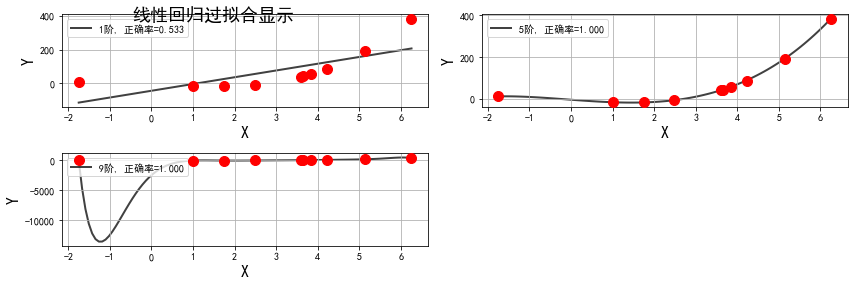

In [103]:
## 线性模型过拟合图像识别
plt.figure(facecolor='w')
degree = np.arange(1,N,4) # 阶
dm = degree.size
colors = []
for c in np.linspace(16711680, 255, dm):
    colors.append('#b624db')


model  = models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    plt.plot(x,y,'ro',ms=10, zorder=N)
    
    # 设置阶数
    model.set_params(Poly__degree=d)
    # 模型训练
    model.fit(x, y.ravel())
    
    lin = model.get_params('Linear')['Linear']
    print(d ,'阶，系数为：', lin.coef_.ravel())
    
    x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
    x_hat.shape = -1,1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    
    z = N -1 if (d == 2) else 0
    label = '%d阶, 正确率=%.3f' % (d,s)
    plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    
plt.tight_layout(1, rect=(0,0,2,1))
plt.suptitle('线性回归过拟合显示',fontsize=18)
plt.show()

线性回归:1,系数为： [-44.14102611  40.05964256]
线性回归:3,系数为： [ -6.80525963 -13.743068     0.93453895   1.79844791]
线性回归:5,系数为： [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
线性回归:7,系数为： [-41.70721172  52.38570529 -29.56451338  -7.66322829  12.07162703  -3.86969096   0.53286096  -0.02725536]
线性回归:9,系数为： [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]
Ridge回归:1,系数为： [-6.71593385 29.79090057]
Ridge回归:3,系数为： [ -6.7819845  -13.73679293   0.92827639   1.79920954]
Ridge回归:5,系数为： [-0.82920155 -1.07244754 -1.41803017 -0.93057536  0.88319116 -0.07073168]
Ridge回归:7,系数为： [-1.62586368 -2.18512108 -1.82690987 -2.27495708  0.98685071  0.30551091 -0.10988434  0.00846908]
Ridge回归:9,系数为： [-10.50566712  -6.12564342  -1.96421973   0.80200162   0.59148104  -0.23358238   0.20296996  -0.0810983    0.01325045  -0.00077212]
Lasso回归:1,系数为： [-0.         29.27359177]
Lasso回归:3,系数为： [ -6.

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the

Lasso回归:9,系数为： [-0.         -0.         -0.         -0.          0.04439727  0.05587113  0.00109023 -0.00021498 -0.00004479 -0.00000674]
ElasticNetCV:1,系数为： [-14.02825679  32.3553265 ]
ElasticNetCV:3,系数为： [ -6.66008304 -13.71442408   0.90610105   1.80163254]
ElasticNetCV:5,系数为： [-1.51295238 -5.98320164 -1.1186771   1.02500621  0.23647247 -0.01513271]
ElasticNetCV:7,系数为： [-0.         -0.         -0.         -0.15812511  0.22150166  0.02955069 -0.00040066 -0.00046568]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV:9,系数为： [-0.         -0.         -0.         -0.          0.08397418  0.04509086  0.0012296  -0.00017104 -0.00003919 -0.00000641]


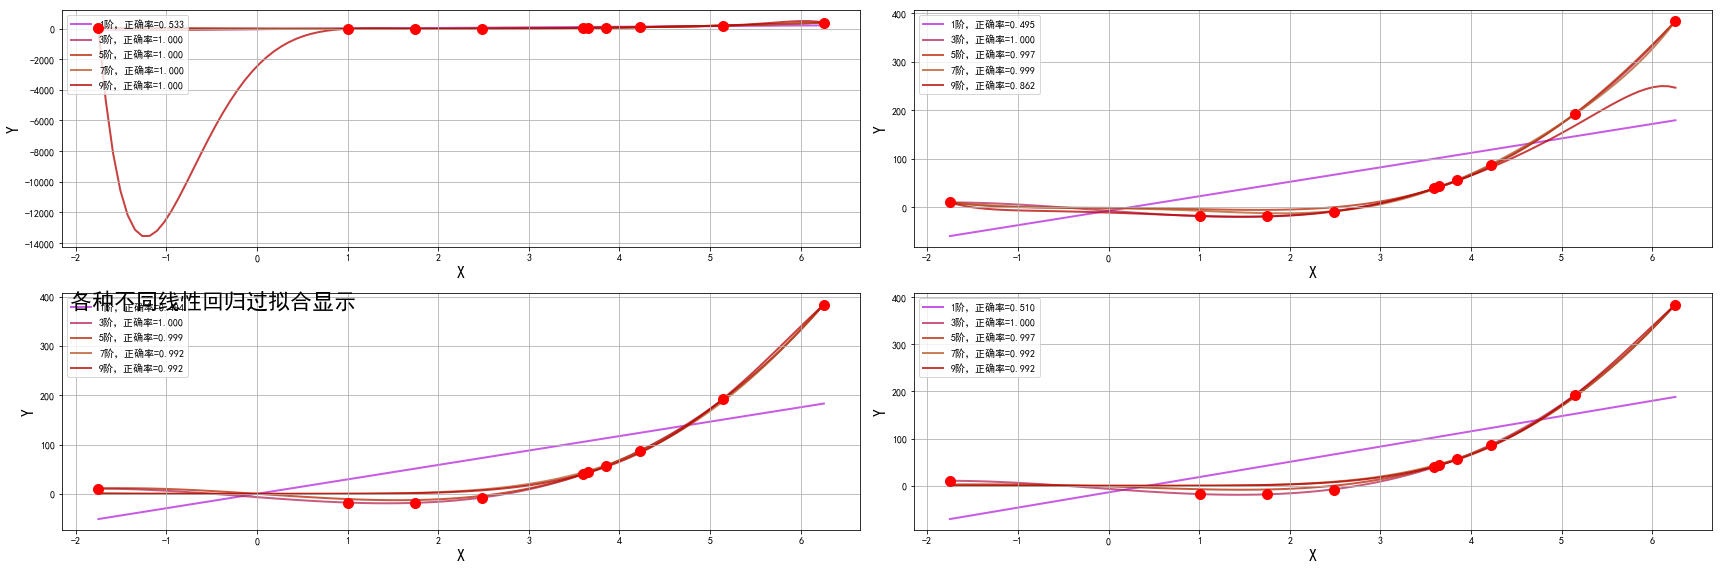

In [110]:
## 线性回归. Lasso回归，Ridge回归,ElasticNet比较
plt.figure(facecolor='w')
degree = np.arange(1,N,2) # 阶
dm = degree.size
colors = ['#b624db','#b62456','#b62400','#b65623','#b60000'] # 颜色
titles = ['线性回归','Ridge回归','Lasso回归','ElasticNetCV']

for t in range(4):
    model = models[t]
    plt.subplot(2,2,t+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)
    
    for i,d in enumerate(degree):
        #设置阶数(多项式)
        model.set_params(Poly__degree = d)
        # 训练模型
        model.fit(x,y.ravel())
        
        # 获取得到具体的算法模型
        lin = model.get_params('Linear')['Linear']
        #打印数据
        output = '%s:%d,系数为：'%(titles[t],d)
        print(output, lin.coef_.ravel())
        
        # 产生模拟数据
        x_hat = np.linspace(x.min(),x.max(),num=100)
        x_hat.shape = -1,1
        #数据预测
        y_hat = model.predict(x_hat)
        # 计算准确率
        s = model.score(x,y)
        
        z = N - 1 if (d == 2) else 0
        label = '%d阶，正确率=%.3f'%(d,s)
        plt.plot(x_hat,y_hat,color = colors[i],lw=2,alpha=0.75,label=label,zorder=z)
    
    plt.legend(loc= 'upper left')
    plt.grid(True)
    plt.xlabel('X',fontsize=16)
    plt.ylabel('Y',fontsize=16)
plt.tight_layout(1,rect=(0,0,4,2))
plt.suptitle('各种不同线性回归过拟合显示', fontsize=22)
plt.show()
        